# Image Processing in Python

This is an introductory tutorial on image processing using Python packages. We will do a code along to understand image data types, manipulate and prepare images for analysis such as image segmentation.

### In this tutorial, we will learn:
- to load images and extract basic statistics
- image data types
- image preprocessing and manipulation
- image segmentation

### Useful links
- Sklearn's image package http://scikit-image.org/
- OpenCV (Open Source Computer Vision library) https://opencv.org/

In [6]:
# Packages used in this tutorial

%pylab inline
import skimage
import numpy as np
from skimage import data

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Load example image from skimage
camera = data.camera()
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

<class 'numpy.ndarray'>
(512, 512)


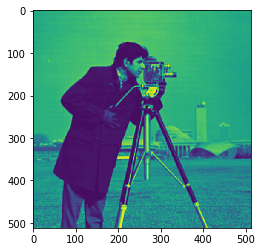

In [99]:
# Camera image
print(type(camera))
print(camera.shape)
imshow(camera)
#plt.imshow(camera, 'gray')

<class 'numpy.ndarray'>
(1059, 1571, 3)


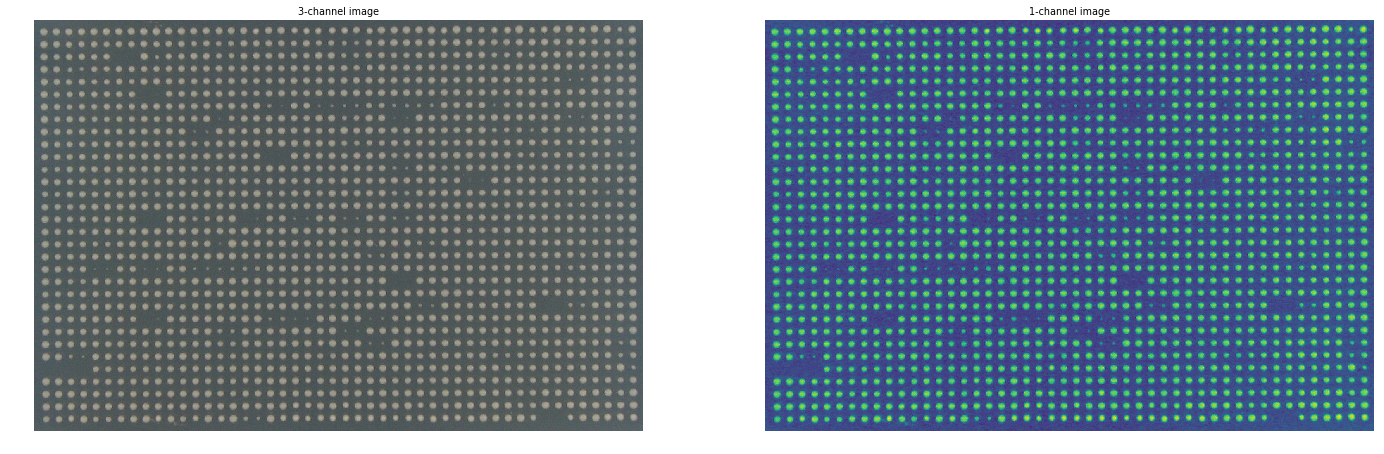

In [150]:
# Load your own image
from skimage import io
colony = io.imread('yeast_colony_array.jpg')
print(type(colony))
print(colony.shape)

# Plot all channels of a real image
plt.figure(figsize=(24, 18))
plt.subplot(121)
plt.imshow(colony[:,:,:])
plt.title('3-channel image')
# Plot one channel only
plt.axis('off')
plt.subplot(122)
plt.imshow(colony[:,:,0])
plt.title('1-channel image')
plt.axis('off');

In [101]:
# Simple statistics
print('Image shape as array: %d x %d' % (camera.shape[0], camera.shape[1]))
print('Number of pixels in the image: %d' % camera.size)
print('Range of pixels: [%d, %d]' % (camera.min(), camera.max()))
print('Average pixel value: %.2f' % camera.mean())

Image shape as array: 512 x 512
Number of pixels in the image: 262144
Range of pixels: [0, 255]
Average pixel value: 118.31


In [ ]:
# Basic manipulation

# Get the pixel value at row 10, column 10 on the 10th row and 20th column
camera[10, 20]
# Set the pixel at row 3, column 10 to black
camera[3, 10] = 0
# Set the first ten lines to black
# Set to black the ten first lines
camera[:10] = 0
# Set to "white" (255) pixels where mask is True
mask = camera < 87
camera[mask] = 255

<class 'numpy.ndarray'>
(300, 451, 3)


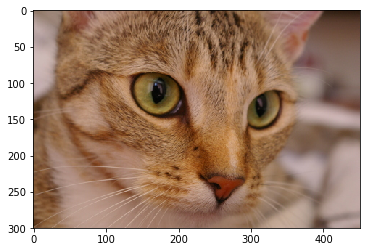

In [53]:
# Change the color for real images
cat = data.chelsea()
print(type(cat))
print(cat.shape)
imshow(cat)

# Set the pixel at row 50, column 61 to green
# [red, green, blue]
cat[50, 61] = [0, 255, 0]

# Set brighter pixels to red
reddish = cat[:, :, 0] > 160
red_cat = cat.copy()
red_cat[reddish] = [255, 0, 0]
imshow(red_cat)

# Change RGB color to BGR for openCV
BGR_cat = cat[:, :, ::-1]
imshow(BGR_cat)

# Convert to gray image
from skimage.color import rgb2gray, gray2rgb
gray_cat = rgb2gray(cat)
new_cat = gray2rgb(gray_cat)
imshow(gray_cat)
imshow(gray_cat, 'gray')
imshow(new_cat)

# Invert (or complement) an image
from skimage import util
inverted_cat = util.invert(cat)
imshow(inverted_cat)

In [26]:
# Converting image dtype

# Function Name  Description
# img_as_float   Convert to 64-bit floating point.
# img_as_ubyte   Convert to 8-bit uint.
# img_as_uint    Convert to 16-bit uint.
# img_as_int     Convert to 16-bit int.

from skimage import img_as_float, img_as_ubyte
float_cat = img_as_float(cat)
uint_cat = img_as_ubyte(float_cat)

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [74]:
# Rescale intensity
print(cat.min(), cat.max())

from skimage import exposure
rescaled_cat = exposure.rescale_intensity(cat, out_range='uint8')
print(rescaled_cat.min(), rescaled_cat.max())

0 231
0 255


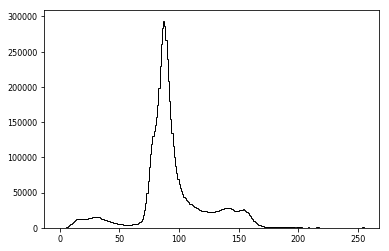

In [131]:
# Display image histograms and change contrast
img = camera.copy()
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

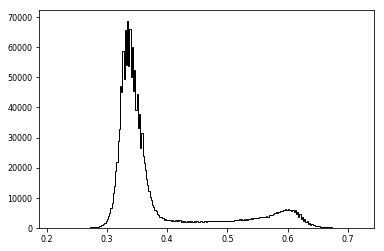

In [151]:
# Image segmentation
# Use colony image for segmentation
img = rgb2gray(colony)
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

# Use thresholding
imshow(img > 0.5)

# Canny edge detector
from skimage.feature import canny
from scipy import ndimage as ndi
img_edges = canny(img)
img_filled = ndi.binary_fill_holes(edges)
# Also show with cat
img_edges = canny(cat[:,:,0]/255.)
img_filled = ndi.binary_fill_holes(img_edges)
imshow(img_edges, 'gray')
imshow(img_filled, 'gray')

# Elevation map and watershed transform
from skimage.filters import sobel
from skimage.morphology import watershed
elevation_map = sobel(img)
imshow(elevation_map, 'gray')
markers = np.zeros_like(img)
markers[img < 0.35] = 1
markers[img > 0.55] = 2
imshow(markers, 'gray')
segmentation = watershed(elevation_map, markers)
segmentation[segmentation == 1] = 0
imshow(segmentation, 'gray')
labeled_colony, number = ndi.label(segmentation)
imshow(labeled_colony)
print(number) # 36*48 = 1536

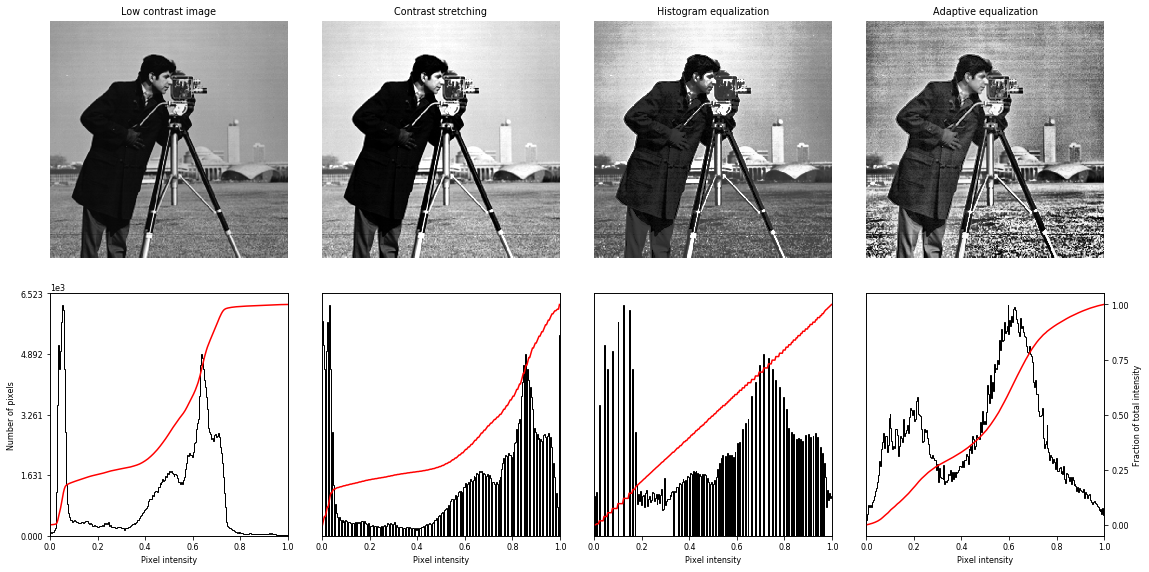

In [245]:
# Display image histograms and change contrast
# http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py

# Load an example image
img = camera.copy()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show()